# Bankruptcy in Taiwan

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'imblearn'

## Prepare Data
### Import
___
In this notebook, the bankruptcy history of companies in Taiwan is used to develop a model that can predict wheteher a company may or may not go bankrupt.

The data is placed in a CSV file.

In [3]:
df = pd.read_csv("taiwanese_bankruptcy_data.csv")
print("Shape of df:", df.shape)
df.head()

Shape of df: (6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Check whether the data contains missing values.

In [4]:
df.isnull().sum() # this gives number of null values for each feature
# df.isnull().sum().sum() # this gives the total number of null values of df

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In the dataframe, there are `6819` observations and `96` features.

### Explore
___
Let's check the type of the features `df` has and identify the target.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

As seen above, all of the features are numerical and that we do not have missing data.

But it is always a good idea to do some visualizations to see if there are any interesting trends or ideas we should keep in mind while we work.

Let's take a look at how many companies are bankrupt, and how many are not. First, we see the row counts, then relative frequencies of the classes is shown. Finally, a plot of class balance is used to say whether the data is imbalanced or not.

In [6]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [ ]:
df.

In [6]:
df["Bankrupt?"].value_counts(normalize= True)

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

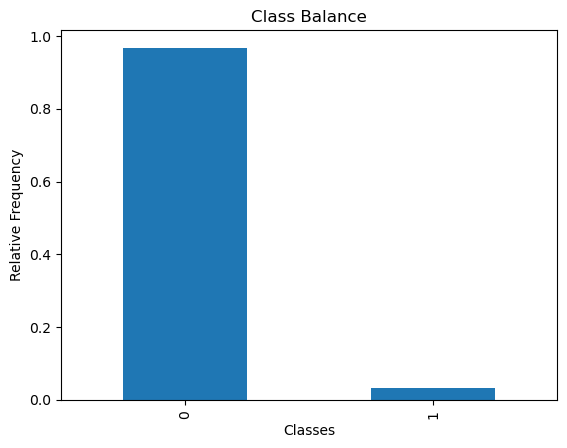

In [7]:
df["Bankrupt?"].value_counts(normalize= True).plot(
    kind= "bar",
    xlabel= "Classes",
    ylabel= "Relative Frequency",
    title= "Class Balance"
);

That's good thing for Taiwan's economy! It looks like most of the companies are doing all right for themselves. However, it also shows that the dataset is imbalanced where the majority class (negative class = `0`) is far bigger than the minority class (positive class = `1`).

Now let's examine the effect of features on the bankrupt status of the companies. This helps to understand where the values for the features cluster.

The following interactive dashboard can be used to see the features descriptive statistics, histogram and boxplot against the target. From the dropdown button, select the name of the feature, and it returns these characteristics of the feature.

The data is trimmed to drop outliers.

In [8]:
col_name_widget = widgets.Dropdown(
                options=list(df.drop("Bankrupt?", axis= 1).columns),
                value=' ROA(C) before interest and depreciation before interest',
                description='Number:',
                disabled=False,
            )

def feat_analysis(col_name):
    print("Descriptive statistics")
    print(df[col_name].describe().apply("{0:,.4f}".format))
    q1, q9 = df[col_name].quantile([0.1, 0.9])
    mask = df[col_name].between(q1, q9)
    print("\n")
    fig, ax = plt.subplots(1, 1)
    df[mask][col_name].hist(ax= ax)
    plt.xlabel(f"{col_name}")
    plt.ylabel("Count")
    plt.title(f"Distribution of{col_name}")
    fig2, ax2 = plt.subplots(1, 1)
    sns.boxplot(x= df[mask]["Bankrupt?"], y= df[mask][col_name], ax= ax2)
    plt.xlabel("Bankrupt")
    plt.ylabel(f"{col_name}")
    plt.title(f"Distribution of{col_name}, by Class")

widgets.interact(feat_analysis, col_name = col_name_widget);

interactive(children=(Dropdown(description='Number:', options=(' ROA(C) before interest and depreciation befor…

As an example, select `Operating Profit Rate`. So, we can see that the data is very skewed to the left, as ***the mean is less than the median***.

From the above boxplot, it can be said no distinct difference between the two classes based on the values of `Operating Profit Rate` feature.

Similar trend can be seen for `Total Asset Growth Rate`.

From the above boxplot and histogram analysis, we can say that the features are either left or right skewed and the mean is less than or greater than the median.

The skewness of the dataset is important when we decide the type of model we want to use.

Another important consideration for model selection is whether there are any issues with multicollinearity in our model. Let's check.

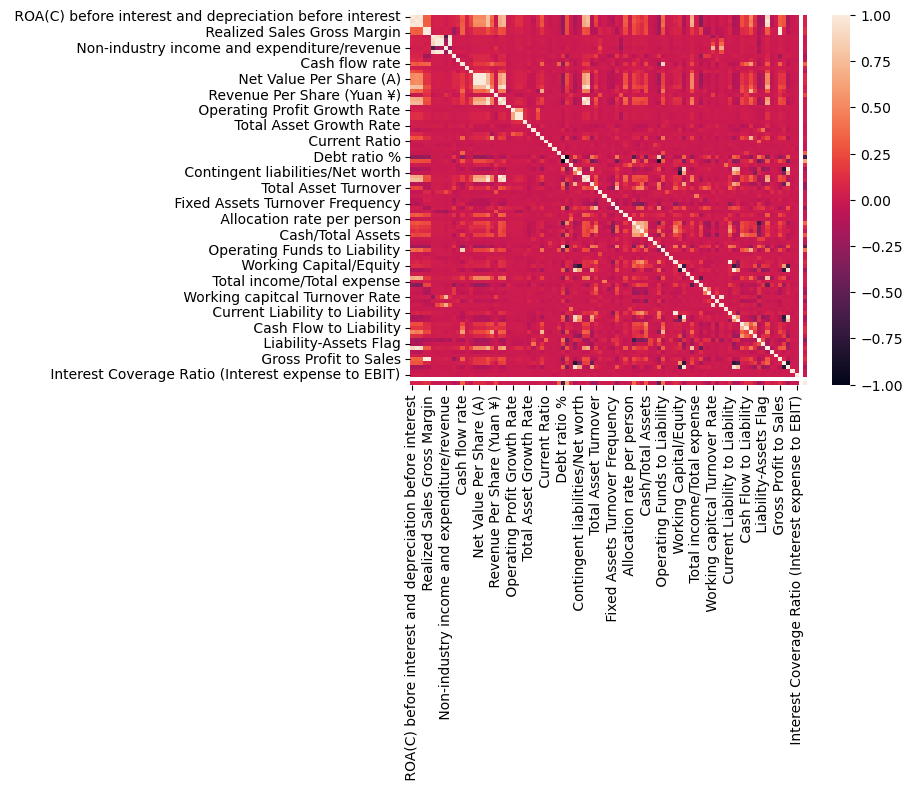

In [9]:
corr = df.drop(columns= "Bankrupt?").corr()
sns.heatmap(corr);

The heatmap indicates that many of the features are highly autocorrelated.

Now from this exploratory data analysis (EDA), the data is imbalanced which will be solved using *resampling*. Since there are no missing values, no need to use imputation. Finally, we have autocorrelation issues, which means we cannot use linear models, and try a tree-based model instead.

### Split
____
For vertical split, the target is the `Bankrupt?` columns and the feature matrix is a matrix withh all remaining columns.

For horizontal split, a randomized train-test split is used to create train and test sets. 20% of the data is used for test set. And set the `random_state` value for reproducibility.

In [10]:
target = "Bankrupt?"
X = df.drop(target, axis= 1)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
X_test shape: (1364, 95)
y_train shape: (5455,)
y_test shape: (1364,)


### Resample
___
Since the data is imbalanced, this issue has to addressed before building a model. One strategy is to `resample` the training data. Here, two types of resampling are used:
* under-sampling
* over-sampling

In [12]:
under_sampler = RandomUnderSampler(random_state= 42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print("X_train_under shape:", X_train_under.shape)
print("y_train_under shape:", y_train_under.shape)
print("Class balance")
y_train_under.value_counts(normalize= True)

X_train_under shape: (338, 95)
y_train_under shape: (338,)
Class balance


Bankrupt?
0    0.5
1    0.5
Name: proportion, dtype: float64

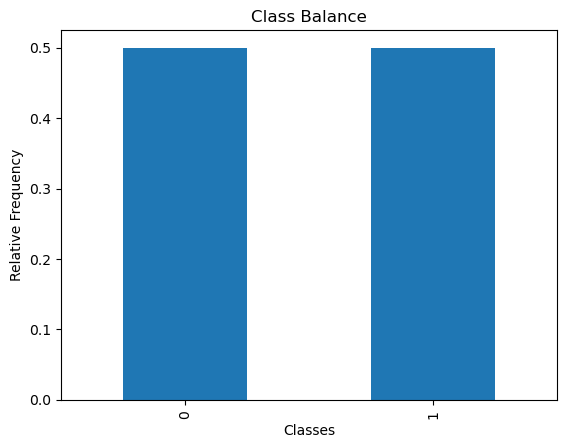

In [13]:
y_train_under.value_counts(normalize=True).plot(
    kind = "bar",
    xlabel = "Classes",
    ylabel = "Relative Frequency",
    title = "Class Balance"
);

This gives a balanced training set, the size of the data is very small when compared to the original set. Let's try over-samplimg.

In [14]:
over_sampler = RandomOverSampler(random_state= 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
print("y_train_over shape:", y_train_over.shape)
y_train_over.value_counts(normalize= True)

X_train_over shape: (10572, 95)
y_train_over shape: (10572,)


Bankrupt?
0    0.5
1    0.5
Name: proportion, dtype: float64

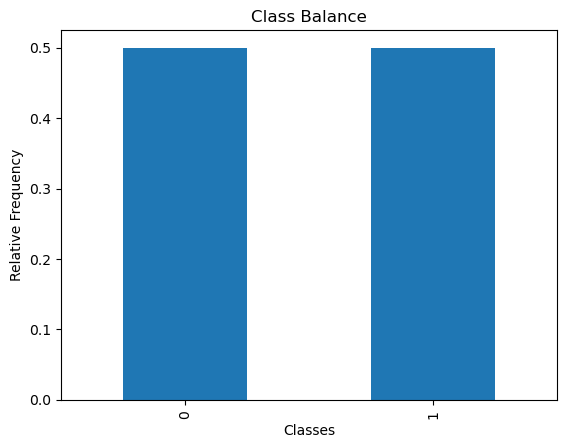

In [15]:
y_train_over.value_counts(normalize= True).plot(
    kind = "bar",
    xlabel = "Classes",
    ylabel = "Relative Frequency",
    title = "Class Balance"
);

From the above two resamples, the training set becomes balanced with equal number of the two classes. Now, Let's use the resampled data to build a model (in this case a `decision tree model`).

## Build Model
### Baseline
___
Before building model, set a baseline to compare with. As the problem is classification, the baseline is the accuracy score of the training target set, which is the maximum relative frequency of the two classes.

In [16]:
base_acc = y_train.value_counts(normalize= True).max()
print("Baseline accuracy:", round(base_acc, 4))

Baseline accuracy: 0.969


Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually good.

### Model 1: Decision Tree Classifier
___
Now, let's build a model and check if it can beat the baseline.

Here, three models are developed using the imbalanced training set, under-sampled training set, and over-sampled training set. All of them use `DecisionTreeClassifier`.

In [17]:
# using X_train and y_train
model_reg = DecisionTreeClassifier(random_state = 42)
model_reg.fit(X_train, y_train)

# using X_train_under, y_train_under
model_under = DecisionTreeClassifier(random_state = 42)
model_under.fit(X_train_under, y_train_under)

# using X_train_over, y_train_over
model_over = DecisionTreeClassifier(random_state = 42)
model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=42)

### Evaluate
___
Check the accuracy score of the models.

In [18]:
for model in [model_reg, model_under, model_over]:
    print("Training accuracy score:", round(model.score(X_train, y_train), 4))
    print("Test accuracy score:", round(model.score(X_test, y_test), 4))

Training accuracy score: 1.0
Test accuracy score: 0.9531
Training accuracy score: 0.813
Test accuracy score: 0.8057
Training accuracy score: 1.0
Test accuracy score: 0.9604


Among these models, `model_over` is the one with better score than the other two, so let's continue with it.
When dealing with imbalanced data, accuracy scores don't tell much about the model's performance. Therefore, let's see how its predictions differ for the two classes in the dataset.

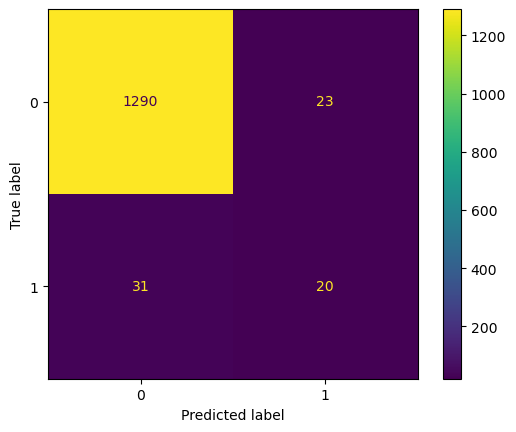

In [19]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

From the above confusion matrix, there are more FP and FN labels than the TP label. This creates less performance indication and the model needs hyperparameter tuning. The goal is to make more precise positive class predictions.

First, let's look the depth of the model.

In [20]:
model_over.get_depth()

53

As the depth is very large, tune the `max_depth` hyperparameter of the model.

In [21]:
depth = range(1, 100, 5)
train_acc_scores = []
test_acc_scores = []
for d in depth:
    model = DecisionTreeClassifier(max_depth= d, random_state= 42)
    model.fit(X_train_over, y_train_over)
    train_acc_scores.append(model.score(X_train, y_train))
    test_acc_scores.append(model.score(X_test, y_test))

acc_scores = pd.DataFrame({"train acc_scores": train_acc_scores,
                           "test acc scores": test_acc_scores}, index= depth)
acc_scores

,train acc_scores,test acc scores
1,0.737855,0.722141
6,0.925573,0.909824
11,0.957104,0.928152
16,0.963336,0.930352
21,0.978552,0.944282
26,0.983685,0.949413
31,0.989918,0.954545
36,0.992667,0.955279
41,0.996700,0.958944
46,0.998533,0.960411


From the above, as far as max_depth increases upto 96, the test score can not beat the baseline. Hence let's use another model.

### Model 2: Random Forest Classifier
___

In [22]:
# classifier
clf = RandomForestClassifier(random_state= 42)

# make cross validation score
cross_val_score(clf, X_train_over, y_train_over, cv= 5, n_jobs= -1)

array([0.99338061, 0.99432624, 0.99432356, 0.99668874, 0.99432356])

In [23]:
# hyperparameters to tune
params = {
    "n_estimators": range(10, 120, 20),
    "max_depth": range(10, 60, 10)
}

# model
model = GridSearchCV(clf, param_grid= params, cv= 5, n_jobs= -1, verbose= 1)

# model fitting
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(10, 120, 20)},
             verbose=1)

The best score is:

In [25]:
model.best_score_

0.9951761419423812

Let's look at the results. The cross-validation results from model are:

In [28]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.045134,0.034034,0.023133,0.008437,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.981087,0.979196,0.979659,0.979659,0.979659,0.979852,0.000643,25
1,2.886838,0.036632,0.032023,0.000737,10,30,"{'max_depth': 10, 'n_estimators': 30}",0.979196,0.977305,0.980132,0.978713,0.980132,0.979096,0.001050,27
2,4.765024,0.039519,0.048508,0.009679,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,26
3,6.524415,0.035583,0.048831,0.001390,10,70,"{'max_depth': 10, 'n_estimators': 70}",0.978251,0.979196,0.978240,0.979659,0.978713,0.978812,0.000551,29
4,8.340254,0.101598,0.066413,0.018908,10,90,"{'max_depth': 10, 'n_estimators': 90}",0.978723,0.979196,0.978713,0.980132,0.978240,0.979001,0.000641,28
5,11.294713,0.312004,0.085827,0.012427,10,110,"{'max_depth': 10, 'n_estimators': 110}",0.978251,0.979669,0.977294,0.980132,0.978713,0.978812,0.001011,30
6,1.376454,0.108179,0.032095,0.015164,20,10,"{'max_depth': 20, 'n_estimators': 10}",0.989598,0.988180,0.991012,0.987228,0.989593,0.989122,0.001304,19
7,4.056235,0.123994,0.055816,0.016120,20,30,"{'max_depth': 20, 'n_estimators': 30}",0.987234,0.988180,0.990539,0.989120,0.989593,0.988933,0.001141,20
8,6.188432,0.208230,0.044294,0.008127,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.987234,0.987707,0.989120,0.990066,0.987701,0.988366,0.001060,22
9,8.062610,0.079841,0.066864,0.004455,20,70,"{'max_depth': 20, 'n_estimators': 70}",0.987234,0.988180,0.989593,0.987701,0.987228,0.987987,0.000877,24


Before getting the best hyperparameters for the model, let's look at how different hyperparameter settings affect training time.

To start with, `n_estimators` is taken and set the `max_depth` equals to 50.

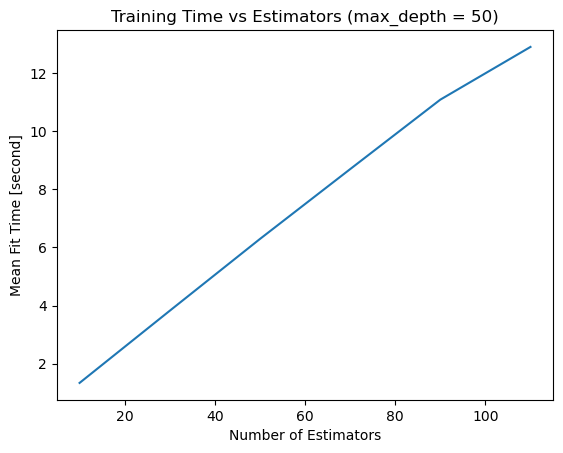

In [29]:
mask = cv_results["param_max_depth"] == 50
plt.plot(cv_results[mask]["param_n_estimators"], cv_results[mask]["mean_fit_time"])
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [second]")
plt.title("Training Time vs Estimators (max_depth = 50)");

From the above figure, the training time increases as the number of estimators increases.

Now, limit the `n_estimatrs` equal to 70, and see the effect of `max_depth` on training time.

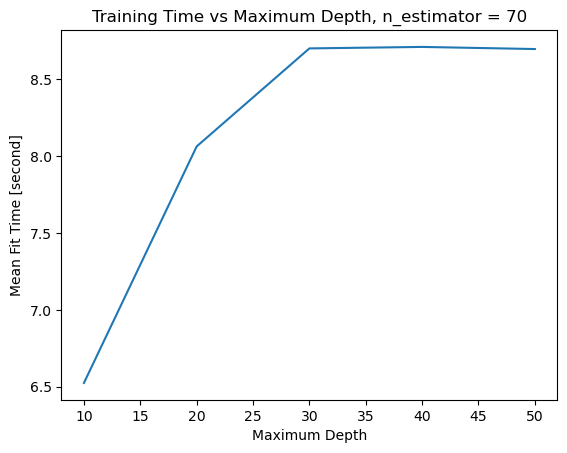

In [32]:
mask = cv_results["param_n_estimators"] == 70
plt.plot(cv_results[mask]["param_max_depth"], cv_results[mask]["mean_fit_time"])
plt.xlabel("Maximum Depth")
plt.ylabel("Mean Fit Time [second]")
plt.title("Training Time vs Maximum Depth, n_estimator = 70");

Similarly, there is an upward trend also here. As the depth increases the training time also increases.

Finally, let's look the hyperparameters that lead to best performance.

In [34]:
print(model.best_params_)

{'max_depth': 50, 'n_estimators': 50}


### Evaluate
___

In [36]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(round(train_score, 3))
print(round(test_score, 3))

1.0
0.967


The test score misses the baseline, but it is very close. What about the confusion matrix?

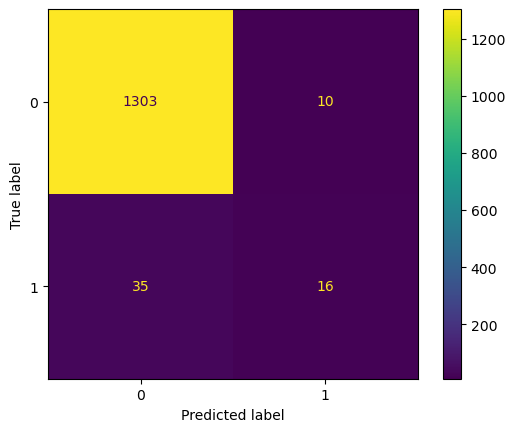

In [37]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);